# Softmax Classifier 1

In [1]:
# Input Libraries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [2]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [3]:
# create random seed

torch.manual_seed(1729)

# Create the data set

class Data(Dataset):
    
    #constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len =  self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Getting the length
    def __len__(self):
        return self.len
    

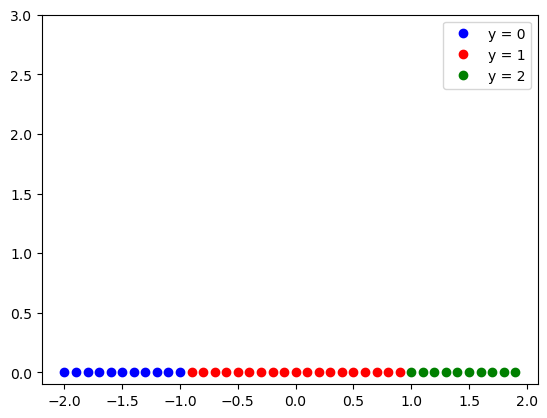

In [4]:
# Creating the dataset and plotting them

data_set = Data()
data_set.x
#print(data_set.x)
plot_data(data_set)

In [5]:
# Building a Softmax Classifier

model = nn.Sequential(nn.Linear(1, 3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3748],
                      [-0.2418],
                      [-0.3827]])),
             ('0.bias', tensor([-0.8528, -0.1568, -0.8619]))])

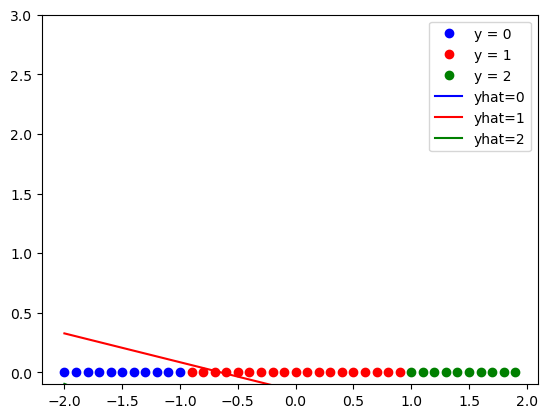

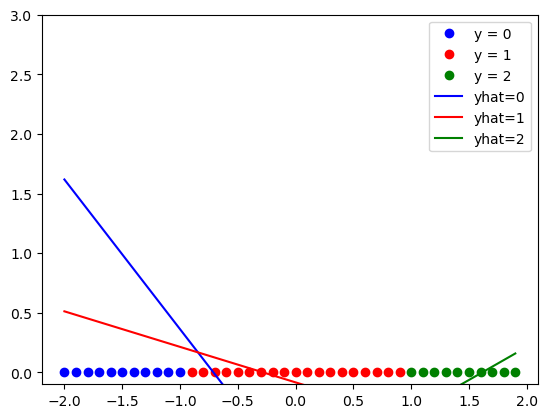

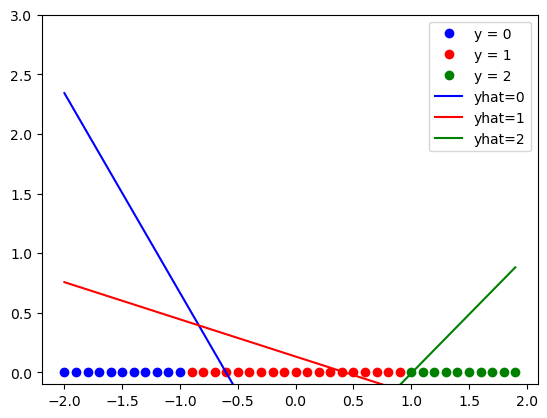

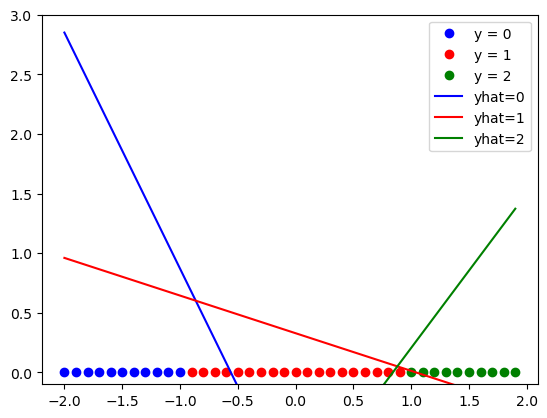

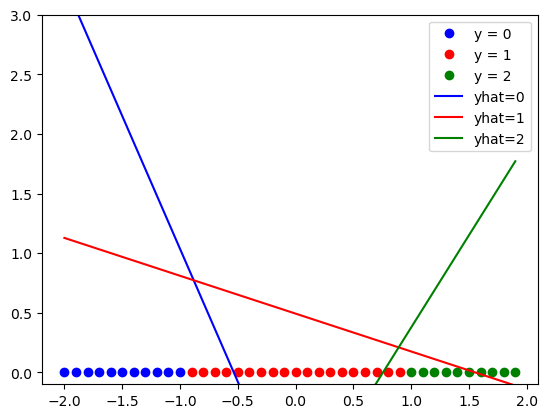

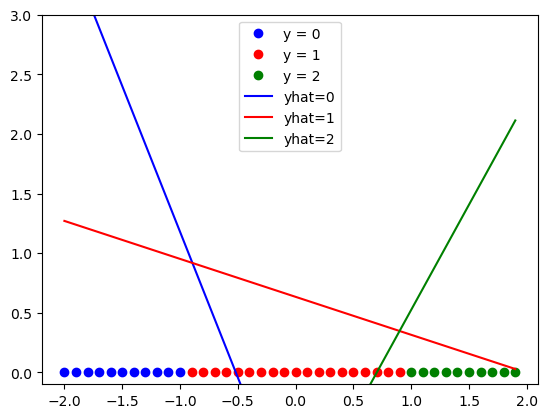

In [6]:
# Train the Model

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
trainloader = DataLoader(dataset=data_set, batch_size=5)

LOSS = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
            plot_data(data_set, model)
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
        
train_model(300)

In [7]:
# Make the predictions and Analyze the result

z = model(data_set.x)
_, yhat = z.max(1)
print('Prediction: ', yhat)

# Check Accuracy

correct = (data_set.y - yhat).sum().item()
accuracy = correct / len(data_set)
print('The accuracy: ', accuracy)

Prediction:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
The accuracy:  0.0


In [8]:
# Softmax Function to Convert hte Output to Probability

Softmax_fn = nn.Softmax(dim=1)

probability = Softmax_fn(z)

for i in range(3):
    print('probability of class {} is given by {}'.format(i, probability[i, 0]))

probability of class 0 is given by 0.9273092150688171
probability of class 1 is given by 0.910037100315094
probability of class 2 is given by 0.889142632484436


# Softmax Classifier 2

In [9]:
# Import the Libraries

import torch
import torch.nn as nn
import torchvision.transforms as transforms   # library for working on image datasets
import matplotlib.pyplot as plt
import torchvision.datasets as dsets          # torchvision.datasets stored image datasets
import numpy as np

In [10]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [11]:
# Plot the data and visualize them

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))#.item()))

In [12]:
# Data preparation

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print('Training data: \n', train_dataset)
print('Validation data: \n', validation_dataset)

Training data: 
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Validation data: 
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [13]:
# Print the type of the element

print("Type of data element: ", train_dataset[0][1])#.type())

# Print the label

print("The label: ", train_dataset[3][1])

Type of data element:  5
The label:  1


The image:  None


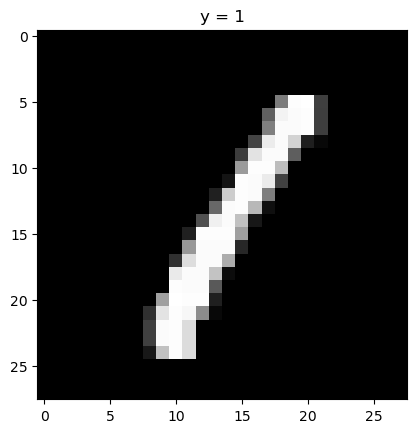

In [14]:
# Plot the image

print("The image: ", show_data(train_dataset[3]))

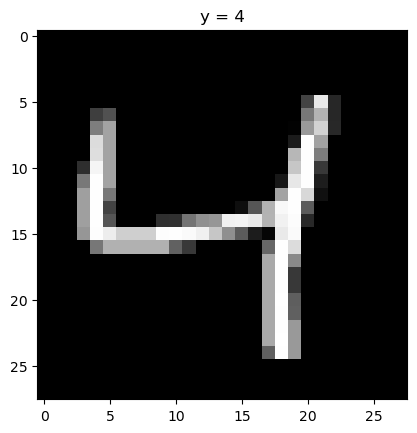

In [15]:
# Plot the image

show_data(train_dataset[2])

In [16]:
# Building a Softmax Classifier

class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):  # constructor
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        z = self.linear(x)
        return z

In [17]:
# Shape of the train dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [18]:
# Set input and output size 

input_dim = 28 * 28
output_dim = 10

# Create model 

model = SoftMax(input_dim, output_dim)
print('Print te model:\n', model)

# Print the parameters
print('W:', list(model.parameters())[0].size())
print('b:', list(model.parameters())[1].size())

Print te model:
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
W: torch.Size([10, 784])
b: torch.Size([10])


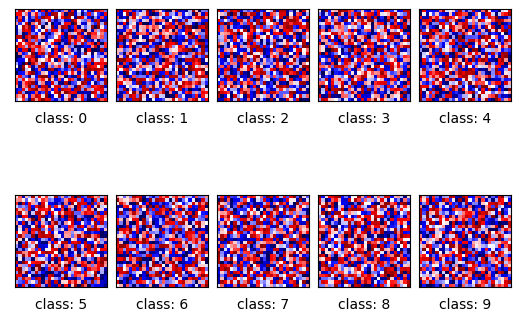

In [19]:
# PLot the model paramwters for each class
PlotParameters(model)

In [20]:
# TRaining the model

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000)

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad() 
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
        
train_model(n_epochs)

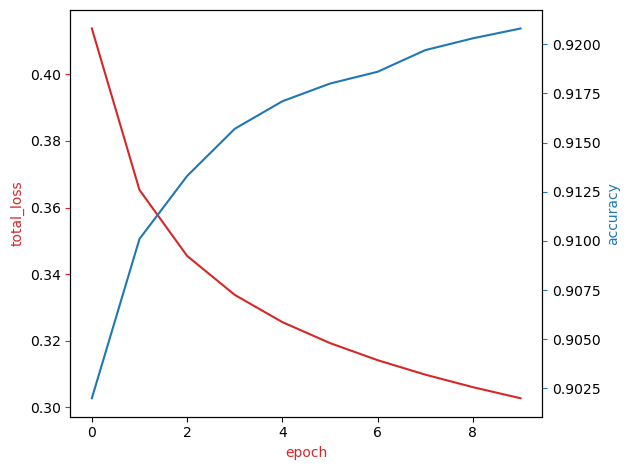

In [21]:
# Analyze the Result
    #plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total_loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(accuracy_list, color=color)
#ax2.set_xlabel('epoch', color=color)
ax2.set_ylabel('accuracy', color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

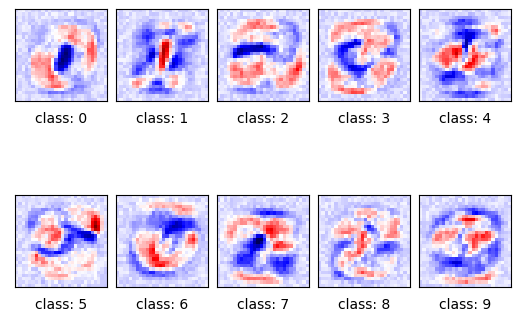

In [22]:
# plot parameters 

PlotParameters(model)

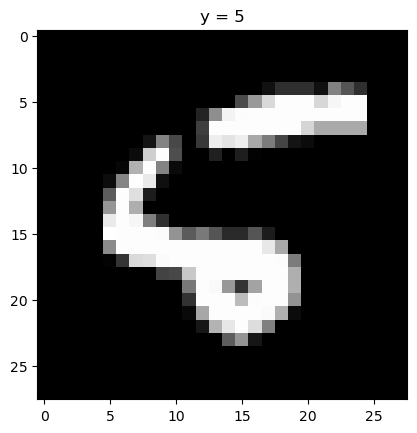

yhat:  tensor([6])
probability of class:  0.9894283413887024


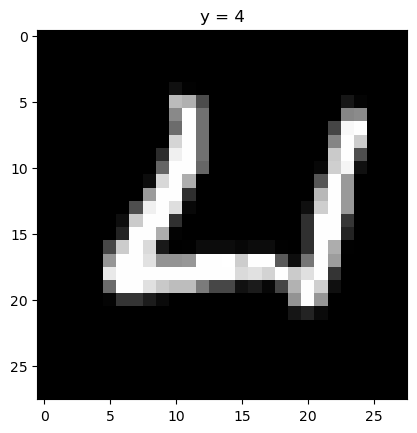

yhat:  tensor([6])
probability of class:  0.4431093633174896


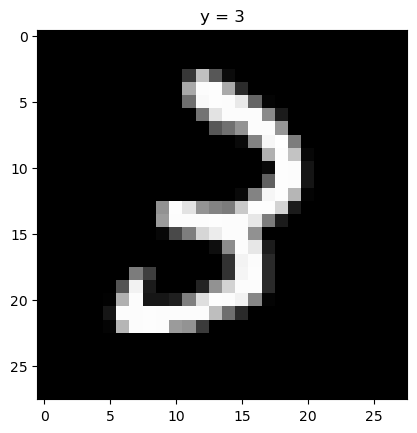

yhat:  tensor([2])
probability of class:  0.6765177845954895


In [23]:
# PLot the misclasified samples
Softmax_fn = nn.Softmax(dim=1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    
    if yhat != y:
        show_data((x, y))
        plt.show()
        print('yhat: ', yhat)
        print('probability of class: ', torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 3:
        break

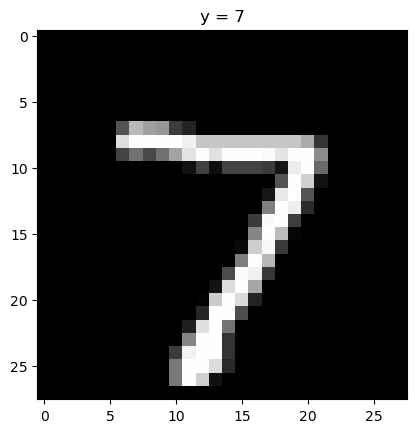

yhat:  tensor([7])
probability of class:  0.996478259563446


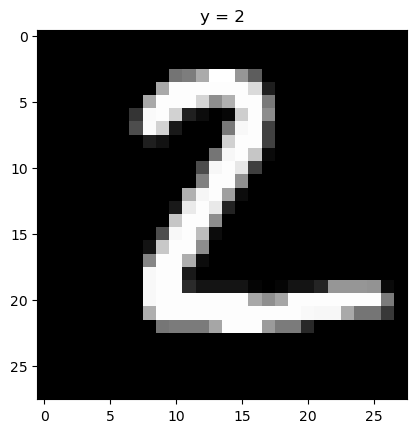

yhat:  tensor([2])
probability of class:  0.942962646484375


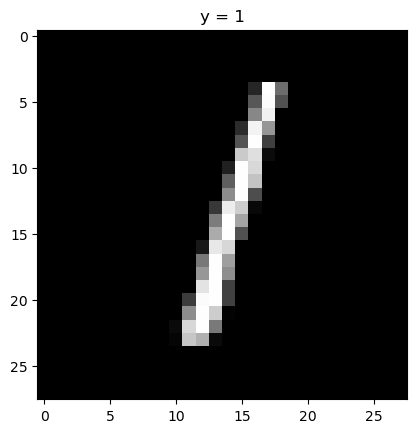

yhat:  tensor([1])
probability of class:  0.9748161435127258


In [24]:
# PLot the clasified samples
Softmax_fn = nn.Softmax(dim=1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    
    if yhat == y:
        show_data((x, y))
        plt.show()
        print('yhat: ', yhat)
        print('probability of class: ', torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 3:
        break

# Simple 1 Hidden Layer Neural Network

In [25]:
# IMport Libraries

import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt
import numpy as np


In [26]:
# manual seeding for beginning 
torch.manual_seed(1729)

# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [27]:
# Neural Network Module 

# Define the class Net
class Net(nn.Module):
    #constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        #hidden layer
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # first linear layer as an attribute
        self.a1 = None
        self.l1 = None
        self.l2 = None
        
    def forward(self, x): #Prediction
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat
    
    

In [28]:
# training the model

def train_model(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total += loss.item() # total loss
        cost.append(total)
        if epoch % 250 == 0:
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost



In [29]:
# Make some data

X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0


#define loss function
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

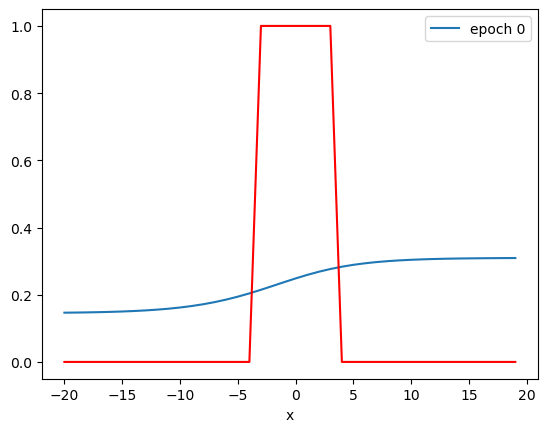

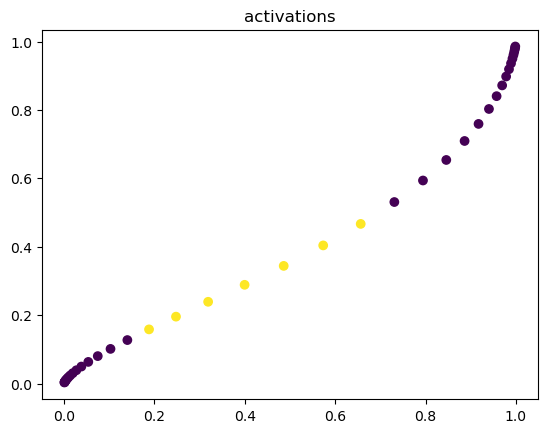

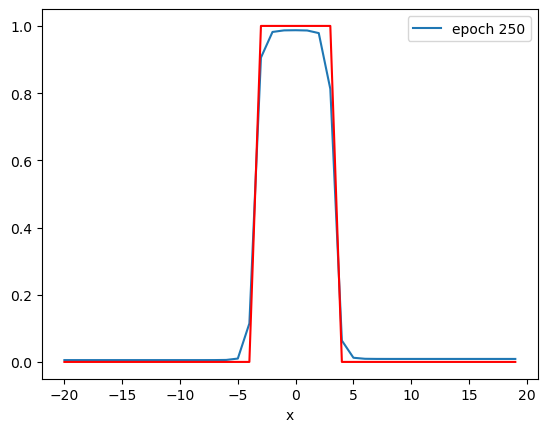

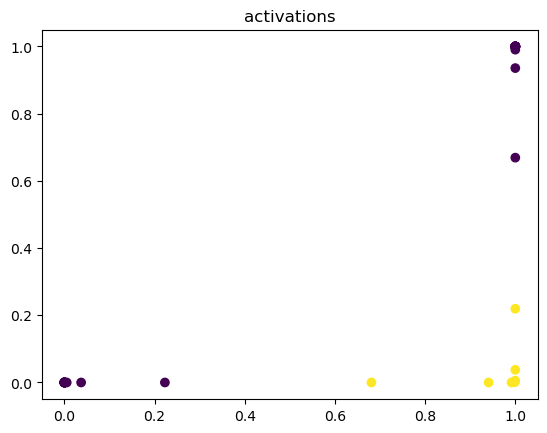

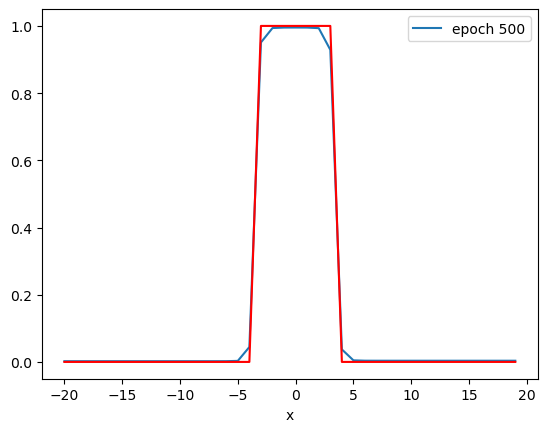

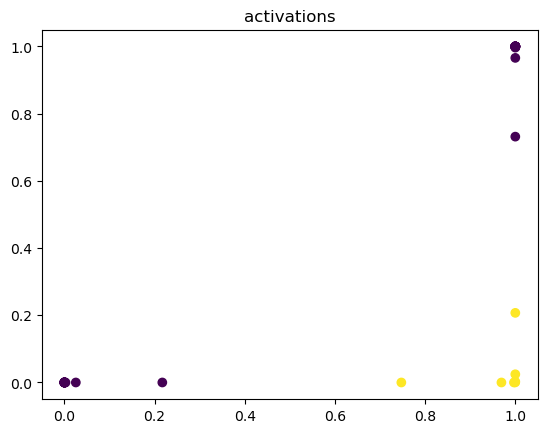

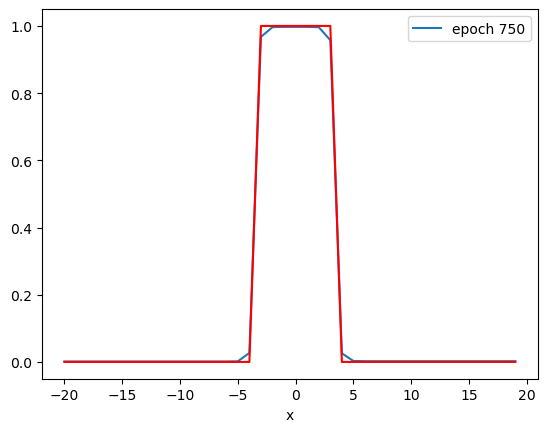

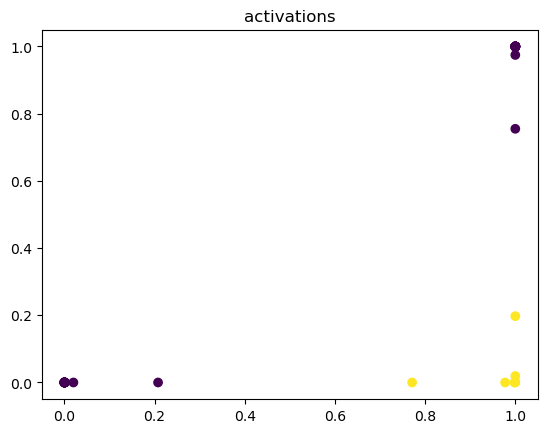

Text(0.5, 1.0, 'cross entropy loss')

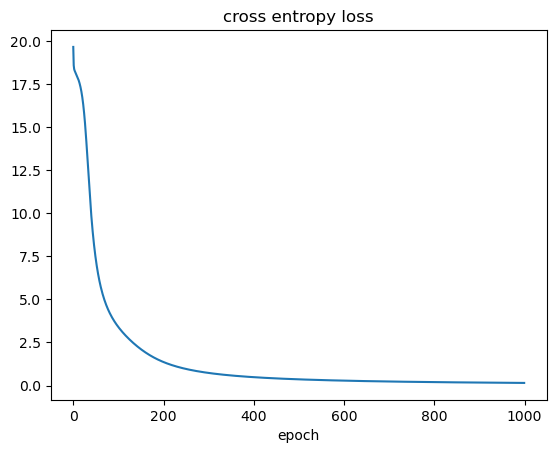

In [30]:
# Train the model
D_in = 1 # inpput dimension
H = 2    # hidden layer dimension
D_out = 1 # output dimension

learning_rate = 0.1

model = Net(D_in, H, D_out)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

cost_cross = train_model(Y, X, model, optimizer, criterion_cross, epochs=1000)

# plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

# Neural Networks: More HIDDEN Neurons

In [31]:
# IMport libraries 

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import Dataset, DataLoader

Defining the PLotting function

In [32]:
def get_hist(model,data_set):
    activations=model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation layer " + str(i+1))
        plt.xlabel("Activation")
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [33]:
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neural network ')

    plt.legend()
    plt.show()

In [34]:
# Deinfing the dataset

class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20, 20, 100).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0] > -10) & (self.x[:, 0] < -5)] = 1
        self.y[(self.x[:, 0] > 5) & (self.x[:, 0] < 10)] = 1
        self.y = self.y.view(-1, 1)
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [35]:
# Class for out model

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [36]:
# Train the dataset

def train_model(data_set, model, criterion, train_loader, optimizer,epochs=5, plot_number=10):
    
    cost = []
    for epoch in range(epochs):
        total = 0
        
        for x, y in train_loader:
            optimizer.zero_grad()
        
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total += loss.item()
        
        if epoch % plot_number == 0:
            PlotStuff(data_set.x, data_set.y, model)
        
        cost.append(total)
    
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

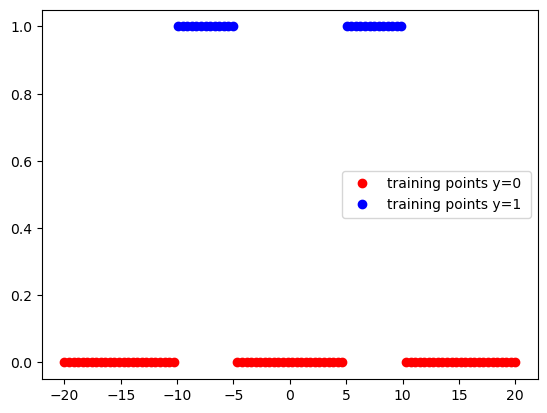

In [37]:
# self initliazied data

data_set = Data()

PlotStuff(data_set.x, data_set.y, leg=False)

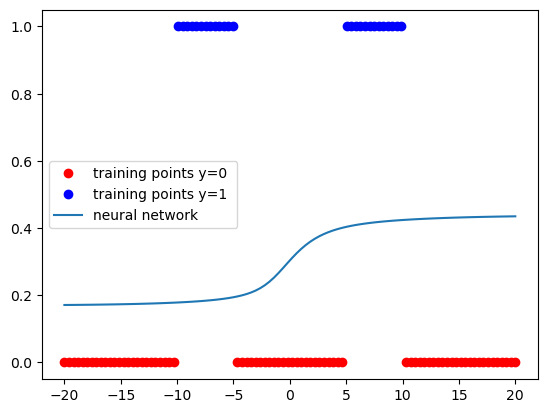

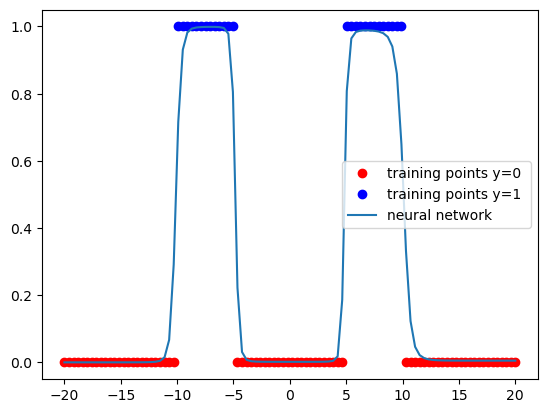

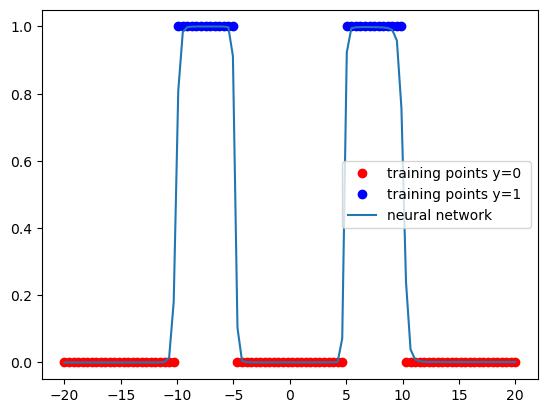

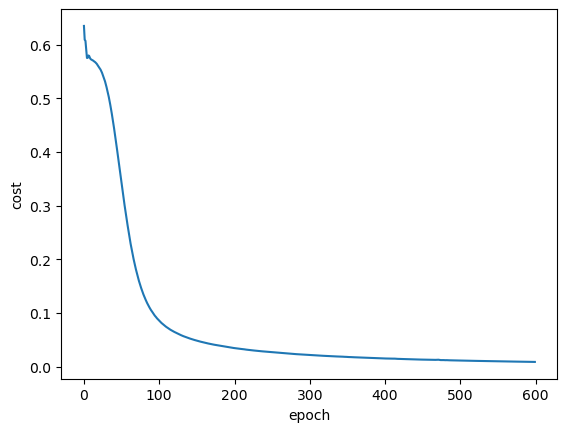

In [38]:
# Create the model with 9 neurons in hidden layer and createBCE loss and Adam Optimizer

torch.manual_seed(1729)

model = Net(1, 9, 1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=100)
COST = train_model(data_set, model, criterion, train_loader, optimizer, epochs=600, plot_number=200)

In [39]:
# Lets try the exercize model

model = torch.nn.Sequential(
    torch.nn.Linear(1, 6),
    torch.nn.Sigmoid(),
    torch.nn.Linear(6, 1),
    torch.nn.Sigmoid()
)

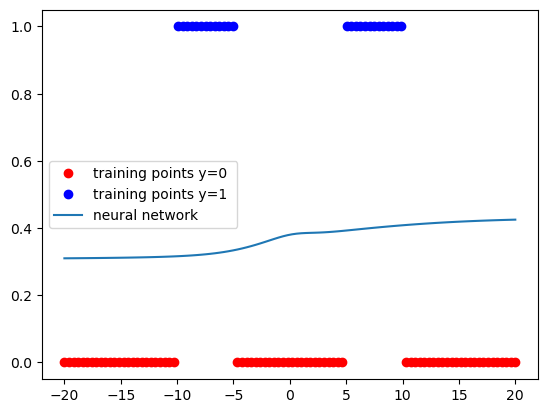

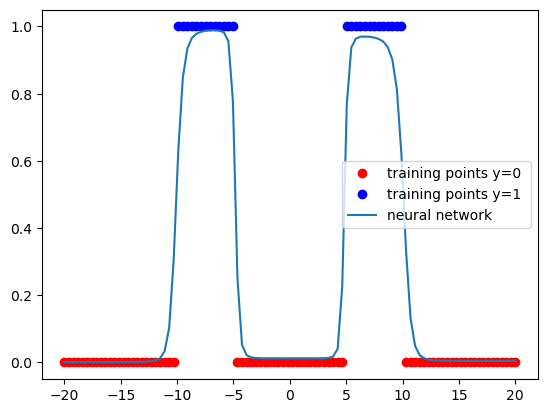

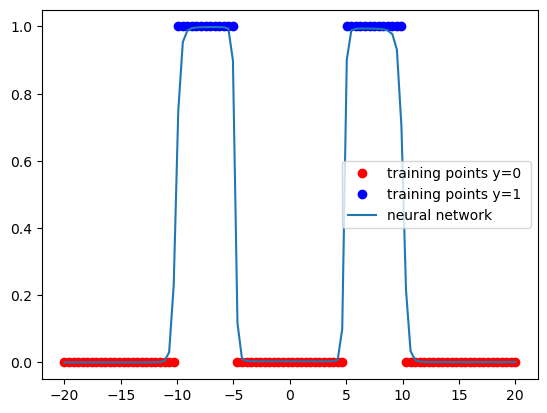

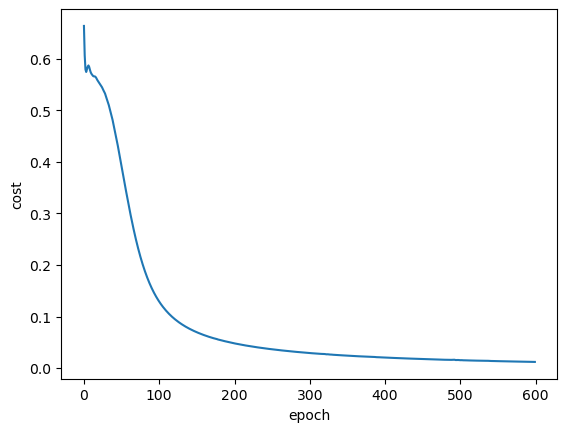

In [40]:
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=100)
COST = train_model(data_set, model, criterion, train_loader, optimizer, epochs=600, plot_number=200)

# Neural MNetworks with Multiple Dimension Inputs

In [41]:
# Import libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [42]:
# Plot the data

def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [43]:
# Calculate the accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

In [44]:
# Define the class Net

class Net(nn.Module):
    
    #constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H) # hidden layer
        self.linear2 = nn.Linear(H, D_out) # output layer
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [45]:
# Function to train the model

def train_model(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    
    for epoch in range(epochs):
        total = 0
        
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total += loss.item() # Cumulative loss
            
        ACC.append(accuracy(model, data_set))
        COST.append(total)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()
    
    plt.show()
    
    return COST

In [46]:
# Create Dataset class

class XOR_Data(Dataset):
    # Constructor
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0])
            self.y[i, 0] = torch.Tensor([0.0])
            
            self.x[i + N_s // 4, :] = torch.Tensor([0.0,1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
            
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
            
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])
            
            self.x = self.x + 0.01 * torch.randn((N_s, 2))
            
        self.len = N_s
        
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    #Get length
    def __len__(self):
        return self.len
    
    # Plotting the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label='y=0')
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label='y=1')
        plt.legend()
        

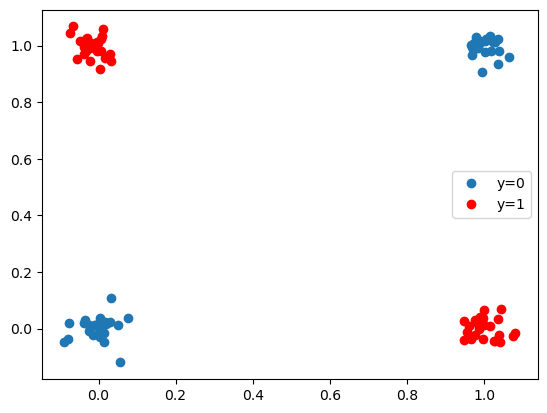

In [47]:
# Create datasset

data_set = XOR_Data()
data_set.plot_stuff()

Neurons

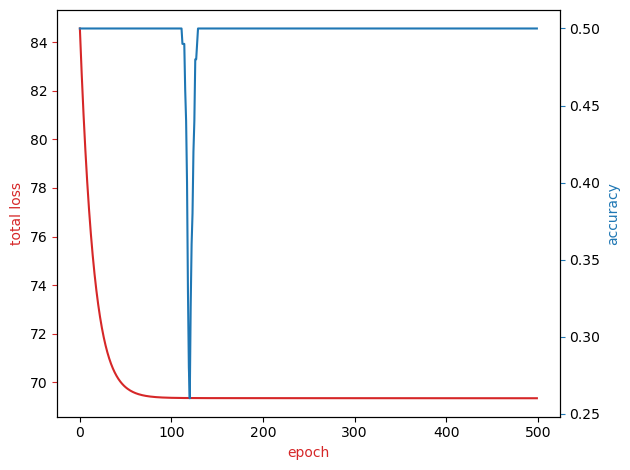

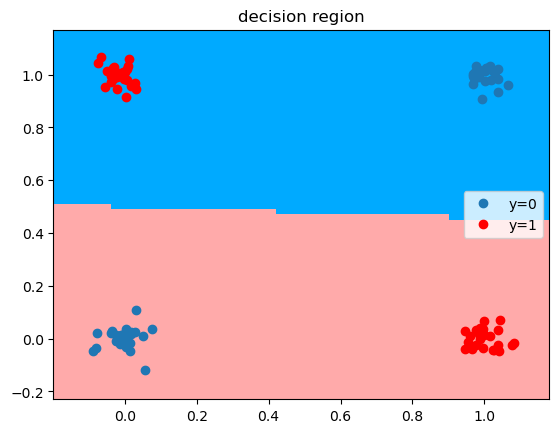

In [51]:
# Try with one Neuron

model = Net(2, 1, 1)
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train_model(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model,data_set)

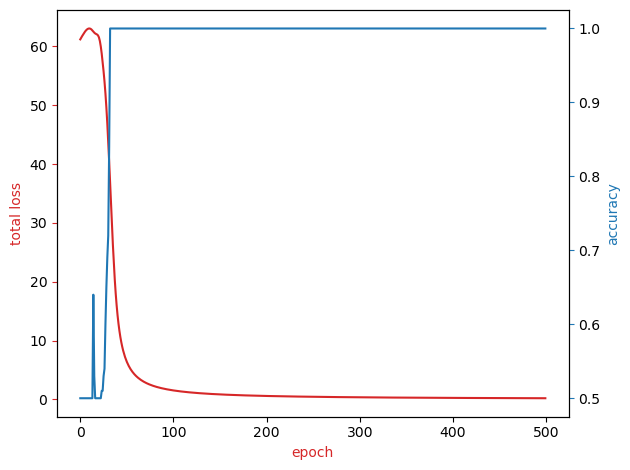

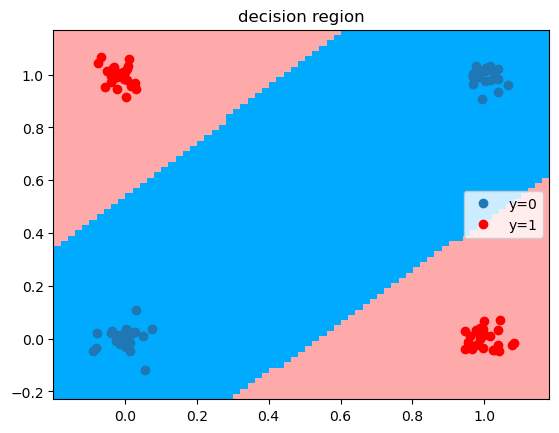

In [52]:
# Try with two Neuron

model = Net(2, 2, 1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train_model(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model,data_set)

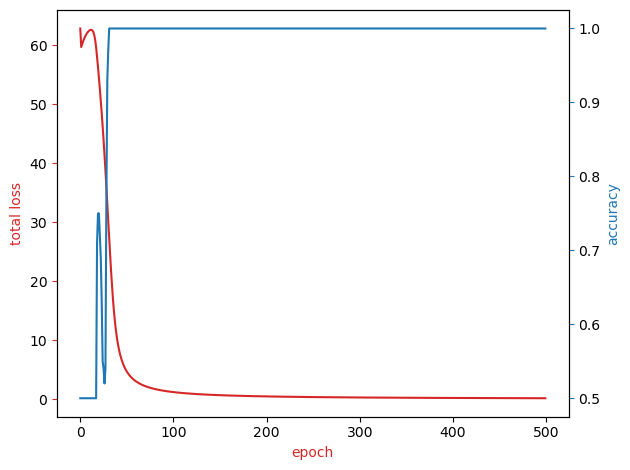

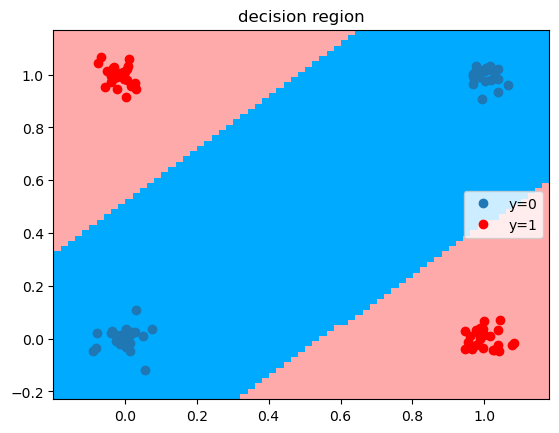

In [50]:
# Try with three Neuron

model = Net(2, 3, 1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=1)
LOSS12 = train_model(data_set, model, criterion, train_loader, optimizer, epochs=500)
plot_decision_regions_2class(model,data_set)

# Multi-Class Neural Network: Neural Networks with One Hidden Layer

In [1]:
# Import libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [13]:
# function to plot accuracy and loss

def plot_accuracy_loss(training_results):
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.show()

In [3]:
# funcction to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find('bias') != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [4]:
# function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [5]:
# Define Neural Network

class Net(nn.Module):
    # constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [6]:
# Training Function

def train_model(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy= 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [7]:
# Create data

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [8]:
# criterion function
criterion = nn.CrossEntropyLoss()

# data_loader
train_loader = DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [9]:
# Create model with 100 neurons

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [10]:
# print model parameters

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [11]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#train the model
 
training_results = train_model(model, criterion, train_loader, validation_loader, optimizer, epochs=100)

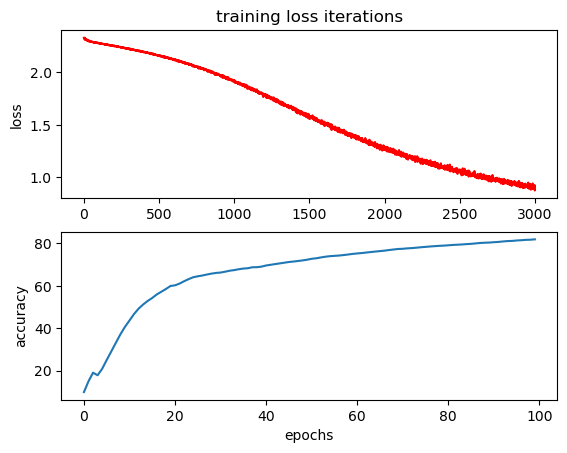

In [14]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

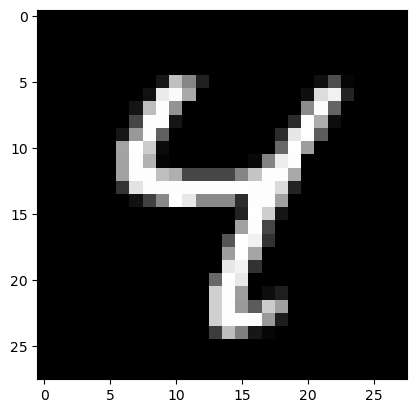

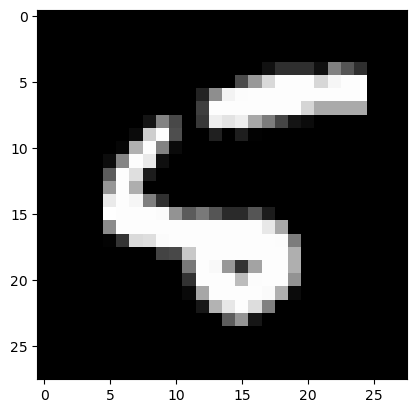

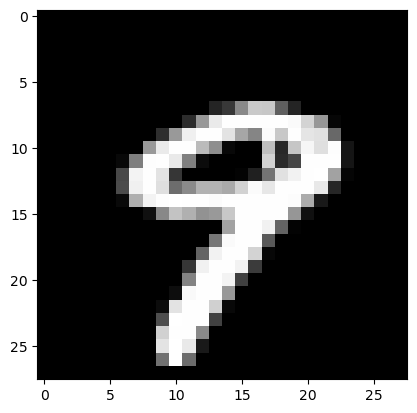

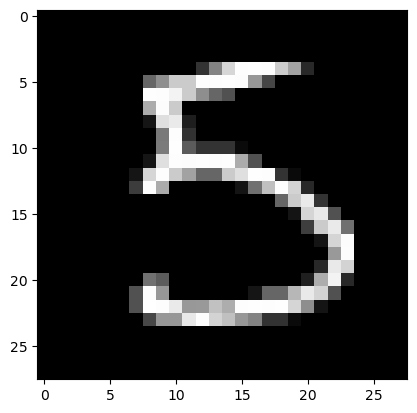

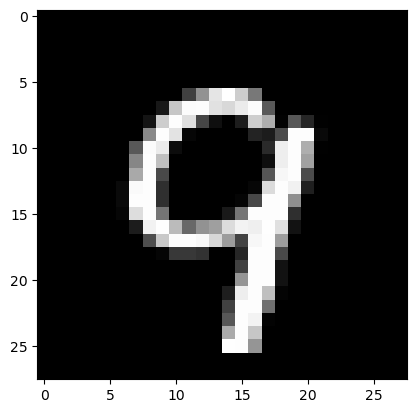

In [16]:
# Plot first 5 misclassied results

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

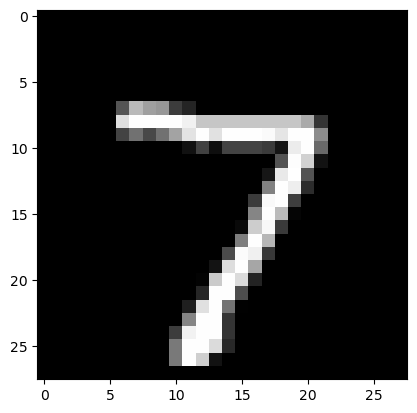

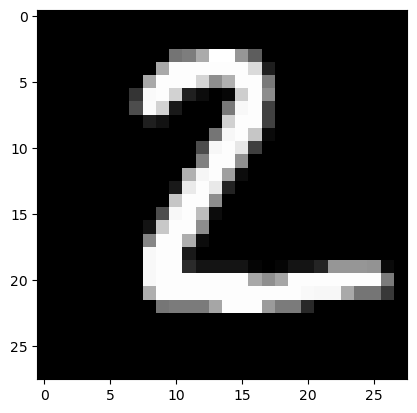

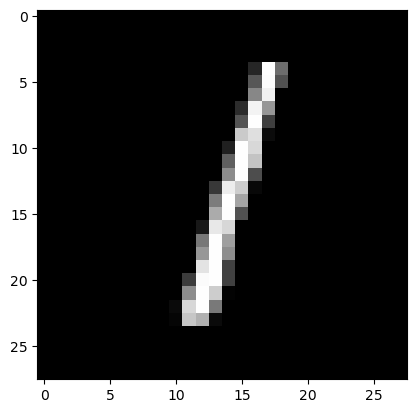

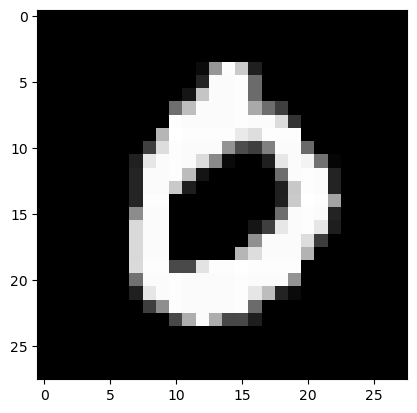

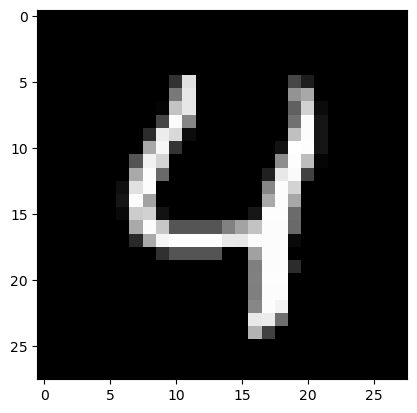

In [17]:
# Plot first 5 classied results

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data(x)
        count += 1
    if count >= 5:
        break

Practice

In [18]:
model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.Sigmoid(),
    nn.Linear(hidden_dim, output_dim)
)

In [19]:
# print model parameters

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [20]:
training_results = train_model(model, criterion, train_loader, validation_loader, optimizer, epochs=100)

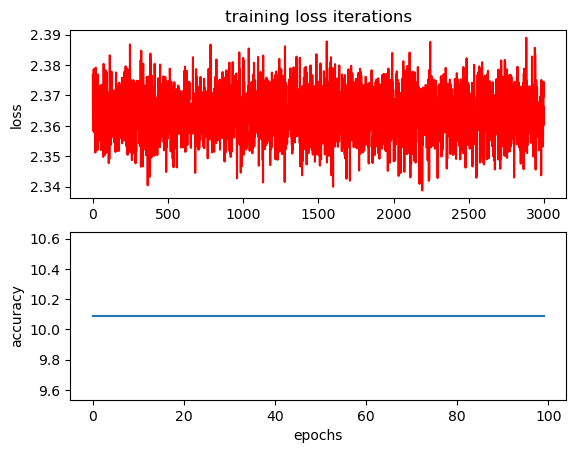

In [21]:
# Plot the accuracy and loss

plot_accuracy_loss(training_results)

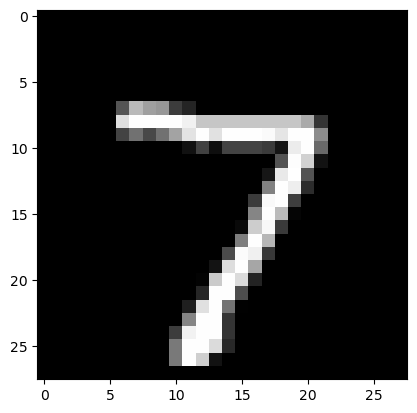

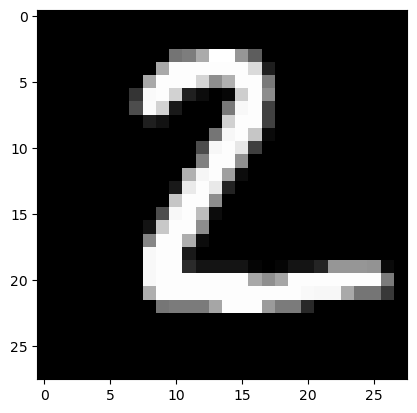

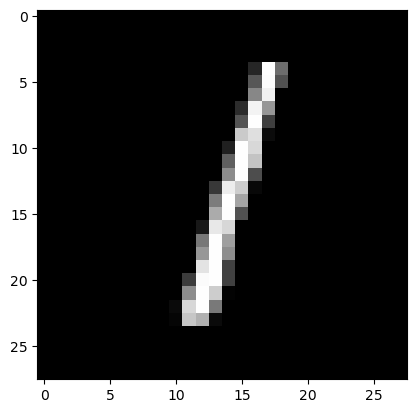

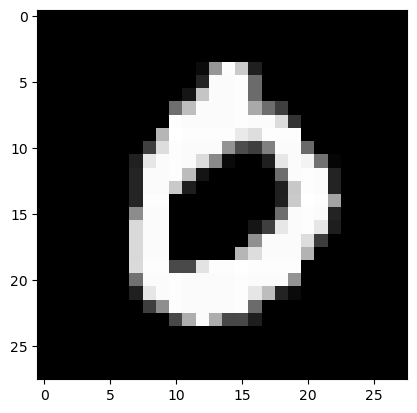

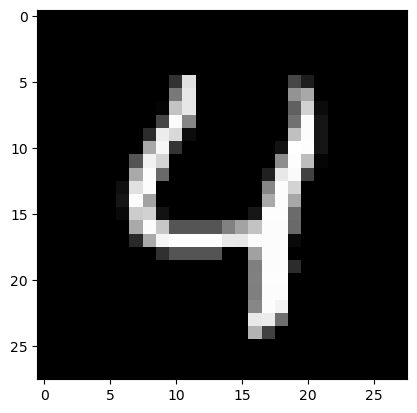

In [22]:
# Plot first 5 misclassied results

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

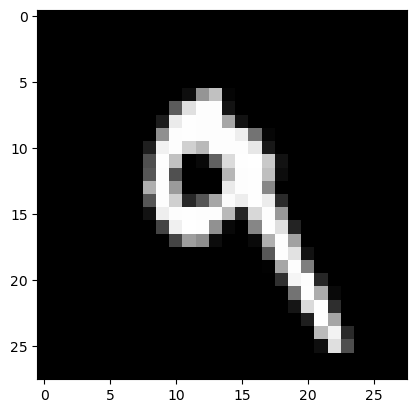

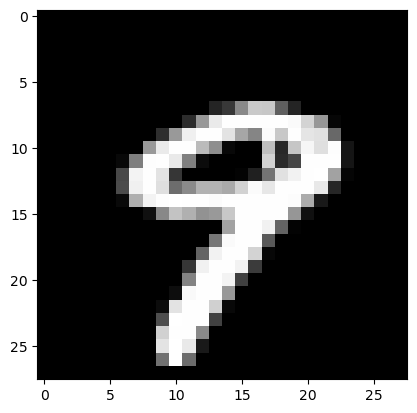

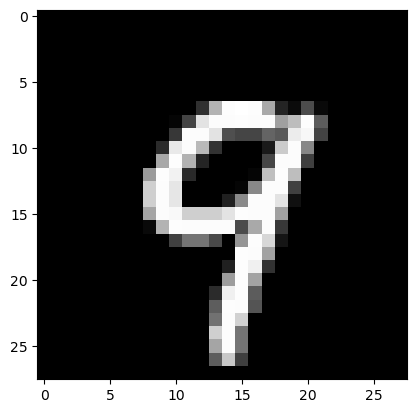

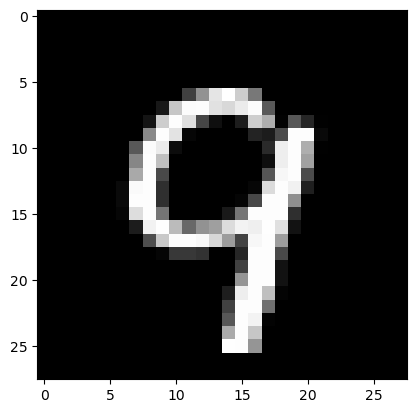

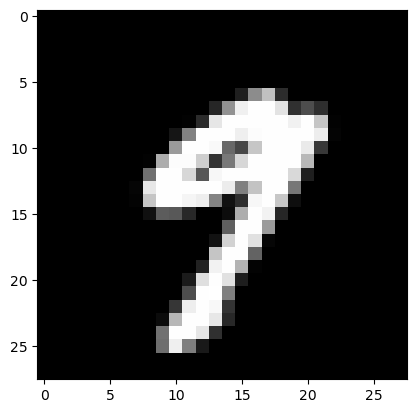

In [23]:
# Plot first 5 classied results

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data(x)
        count += 1
    if count >= 5:
        break

# ACTIVATION FUNCTIONS

In [1]:
# Import libraries

import torch
import torch.nn as nn

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(1729)

Text(0, 0.5, 'yhat')

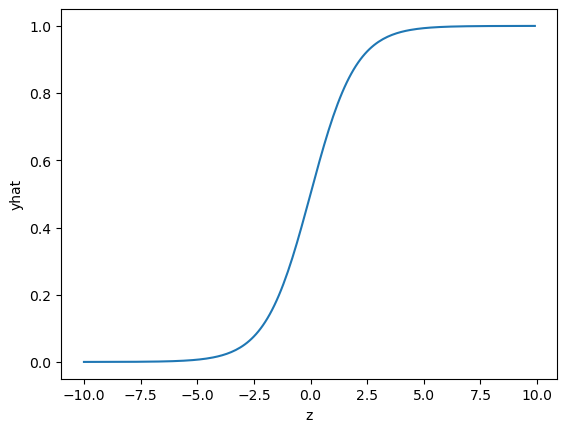

In [5]:
# Create a tensor
z = torch.arange(-10, 10, 0.1).view(-1, 1)

# create sigmoid object
sig = nn.Sigmoid()

# Create a tensor
z = torch.arange(-10, 10, 0.1,).view(-1, 1)

#make prediction
yhat = sig(z)

#plot results
plt.plot(z.detach().numpy(),yhat.detach().numpy())
plt.xlabel('z')
plt.ylabel('yhat')

Text(0, 0.5, 'yhat')

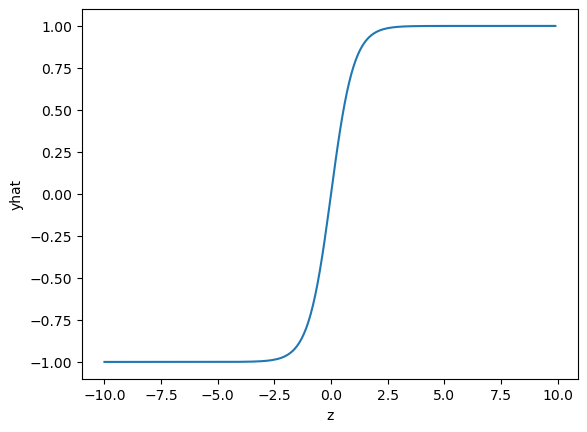

In [6]:
# Create a tensor
z = torch.arange(-10, 10, 0.1).view(-1, 1)

# create sigmoid object
tan_h = nn.Tanh()

# Create a tensor
z = torch.arange(-10, 10, 0.1,).view(-1, 1)

#make prediction
yhat = tan_h(z)

#plot results
plt.plot(z.detach().numpy(),yhat.detach().numpy())
plt.xlabel('z')
plt.ylabel('yhat')

Text(0, 0.5, 'yhat')

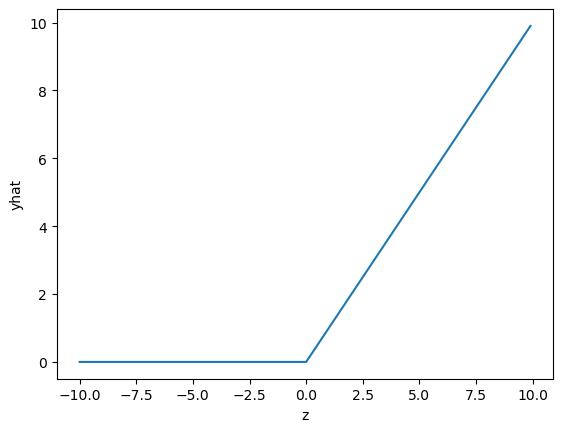

In [8]:
# Create a tensor
z = torch.arange(-10, 10, 0.1).view(-1, 1)

# create sigmoid object
rel_u = nn.ReLU()

# Create a tensor
z = torch.arange(-10, 10, 0.1,).view(-1, 1)

#make prediction
yhat = rel_u(z)

#plot results
plt.plot(z.detach().numpy(),yhat.detach().numpy())
plt.xlabel('z')
plt.ylabel('yhat')

# TEst Different Activation Functions on MNIST Dataset

In [1]:
# Import Libraries

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dset
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Build Neural Network with sigmoid

class Net_sig(nn.Module):
    
    #constructor
    def __init__(self, D_in, H, D_out):
        super(Net_sig, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [3]:
# Build Neural Network with tanh

class Net_tanh(nn.Module):
    
    #constructor
    def __init__(self, D_in, H, D_out):
        super(Net_tanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [4]:
# Build Neural Network with Relu

class Net_relu(nn.Module):
    
    #constructor
    def __init__(self, D_in, H, D_out):
        super(Net_relu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [5]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

In [6]:
# Make Data

train_dataset = dset.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dset.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create dataloader

train_loader = DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [7]:
# Create the model object with sigmoid function

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net_sig(input_dim, hidden_dim, output_dim)

learning_rate = 0.01

# criterion

criterion = nn.CrossEntropyLoss()

# optimizer

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [14]:
# Create the model object with tanh function

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net_tanh(input_dim, hidden_dim, output_dim)

learning_rate = 0.01

# criterion

criterion = nn.CrossEntropyLoss()

# optimizer

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

training_results_tanh = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [17]:
# Create the model object with relu function

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net_relu(input_dim, hidden_dim, output_dim)

learning_rate = 0.01

# criterion

criterion = nn.CrossEntropyLoss()

# optimizer

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

training_results_relu = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

# Deep Neural Network

In [8]:
# Import the libraries we need for this lab

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [9]:
# Neural Network Module and Traning Function

class Net(nn.Module):
    # constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x
    

In [10]:
# Create the model class using Tanh as a activation function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [11]:
# Create the model class using Relu as a activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [12]:
# TRaining model

def train(model, criterion, train_loader,validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}
    
    for epoch in range(epochs):
        for i, (x,y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

In [13]:
# MNIST dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# criterion function
criterion = nn.CrossEntropyLoss()

# train nad vlidation data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [16]:
# Create 100 hidden layers

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

# number of iterations

cust_epochs = 10

In [17]:
# Train the model with sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [18]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [19]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

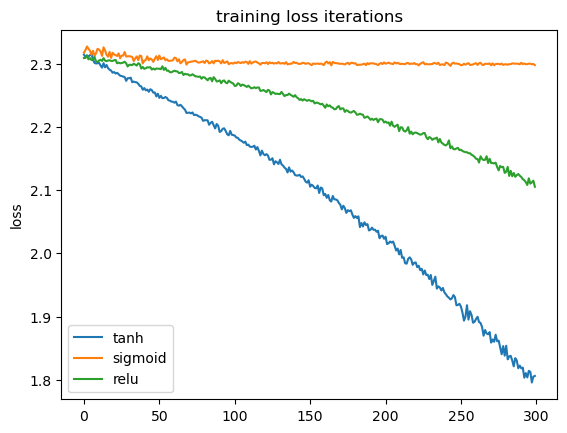

In [20]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

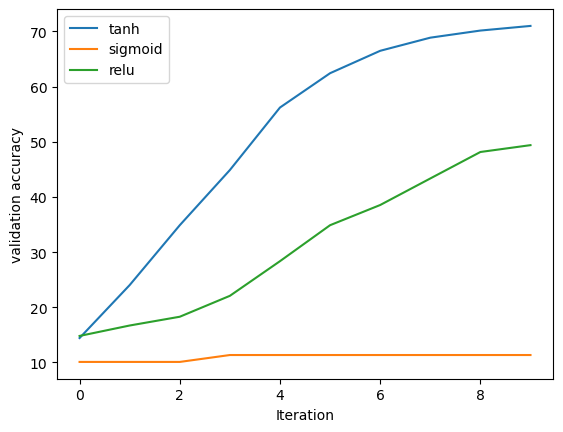

In [21]:
plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()

# Deep Neural Network with nnn.ModuleList()

In [22]:
# import libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [23]:
torch.manual_seed(1729)

In [24]:
# Define the function to plot the diagram

def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _, yhat = torch.max(model(XX), 1)
    yhat = yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:] == 0, 0], X[y[:] == 0, 1], 'ro', label = 'y=0')
    plt.plot(X[y[:] == 1, 0], X[y[:] == 1, 1], 'go', label = 'y=1')
    plt.plot(X[y[:] == 2, 0], X[y[:] == 2, 1], 'o', label = 'y=2')
    plt.title("decision region")
    plt.legend()

In [32]:
# Create data class

class Data(Dataset):
    #constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D))
        y = np.zeros(N * K, dtype='uint8')
        for j in range(K):
            ix = range(N * j, N * (j + 1))
            r = np.linspace(0.0, 1, N)
            t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
            X[ix] = np.c_[r * np.sin(t), r*np.cos(t)]
            y[ix] = j
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]
    
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the diagram
    def plot_stuff(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y = 0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y = 1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(), self.x[self.y[:] == 2, 1].numpy(), 'go', label="y = 2")
        plt.legend()

In [39]:
# Create Net Model Class

class Net(nn.Module):
    # constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
            
    def forward(self, activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [41]:
# Function to train

def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    LOSS = []
    ACC = []
    
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
        ACC.append(accuracy(model, data_set))
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS, color=color)
    ax1.set_xlabel('Iteration', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax1.plot(ACC, color=color)
    #ax1.set_xlabel('Iteration', color=color)
    ax1.set_ylabel('accuracy', color=color)
    ax1.tick_params(axis='y', color=color)
    fig.tight_layout()
    
    plt.show()
    return LOSS

In [30]:
# The function to calculate the accuracy

def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

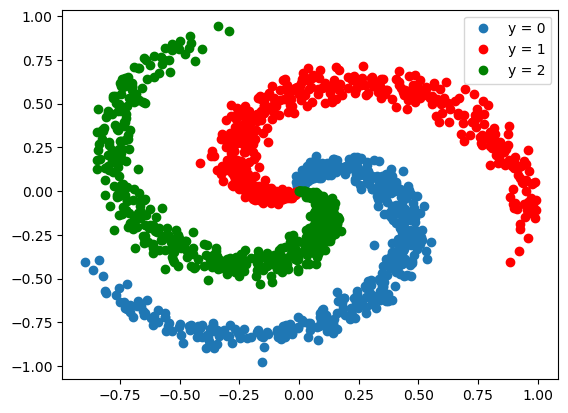

In [35]:
# Create a Dataset object

data_set = Data()
data_set.plot_stuff()
data_set.y = data_set.y.view(-1)

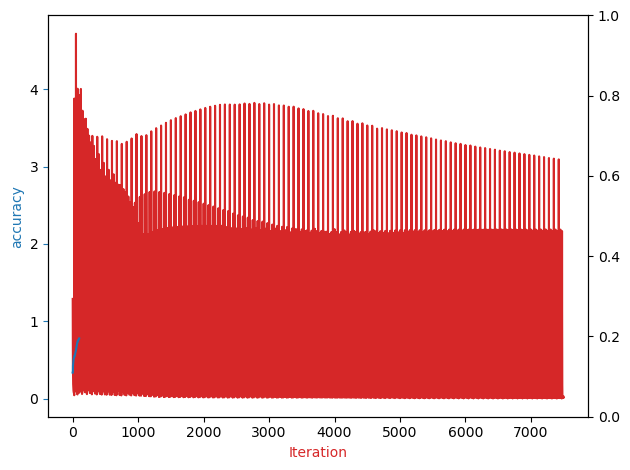

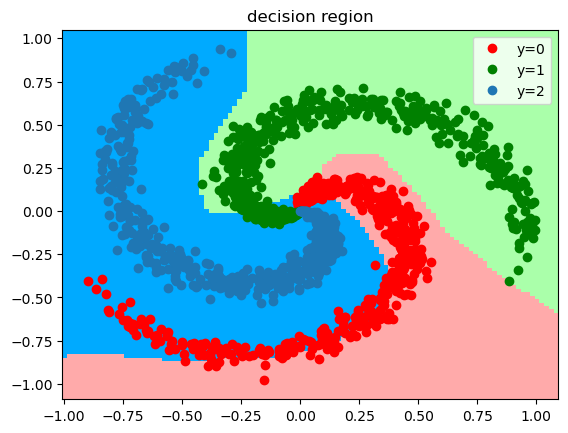

In [42]:
# Train the model with 1 hidden layer with 50 neurons

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
LOSS = train(data_set, model, criterion, train_loader, optimizer, epochs=100)

plot_decision_regions_3class(model, data_set)

In [43]:
# Create a network to classify three classes with 2 hidden layers with 20 neurons in total
Net([3,3,4,3]).parameters

<bound method Module.parameters of Net(
  (hidden): ModuleList(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=4, bias=True)
    (2): Linear(in_features=4, out_features=3, bias=True)
  )
)>

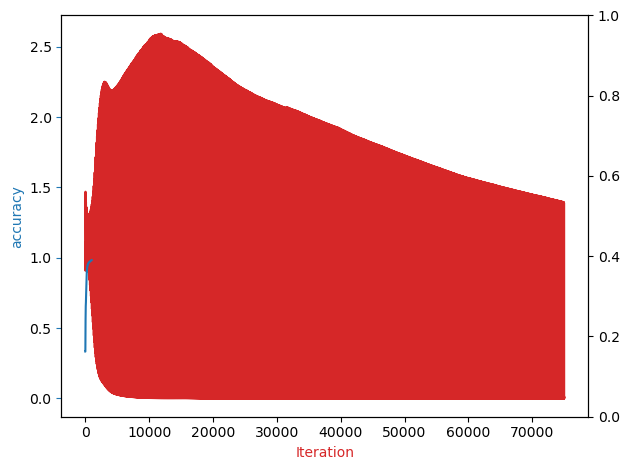

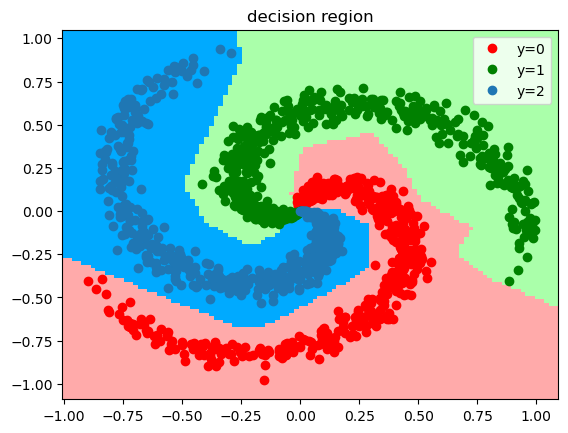

In [44]:
# Train the model with 2 hidden layers with 20 neurons

Layers = [2, 10, 10, 3]
model = Net(Layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
LOSS = train(data_set, model, criterion, train_loader, optimizer, epochs=1000)

plot_decision_regions_3class(model, data_set)

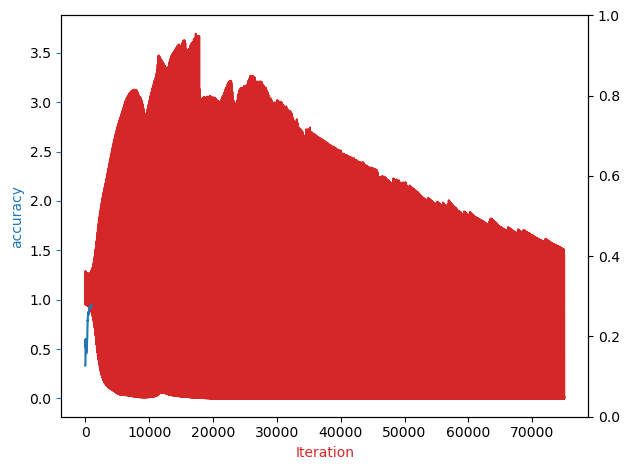

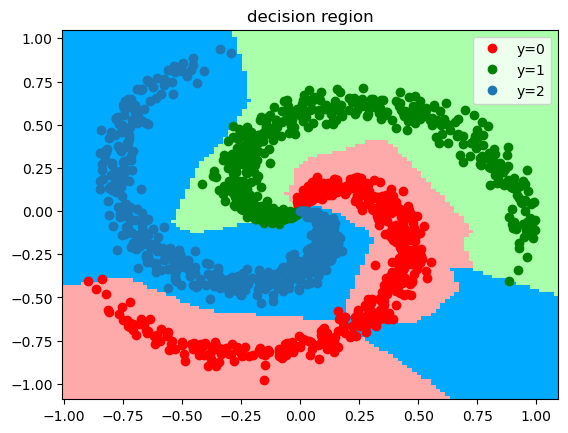

In [45]:
# Train the model with 3 hidden layers each with 10 neurons

Layers = [2, 10, 10, 10, 3]
model = Net(Layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
LOSS = train(data_set, model, criterion, train_loader, optimizer, epochs=1000)

plot_decision_regions_3class(model, data_set)

# Using Dropout for Classification

In [46]:
# Import the libraries we need for this lab

import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [47]:
# The function for plotting the diagram

def plot_decision_regions_3class(data_set, model=None):
    cmap_light = ListedColormap([ '#0000FF','#FF0000'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    newdata = np.c_[xx.ravel(), yy.ravel()]
    
    Z = data_set.multi_dim_poly(newdata).flatten()
    f = np.zeros(Z.shape)
    f[Z > 0] = 1
    f = f.reshape(xx.shape)
    if model != None:
        model.eval()
        XX = torch.Tensor(newdata)
        _, yhat = torch.max(model(XX), 1)
        yhat = yhat.numpy().reshape(xx.shape)
        plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
        plt.contour(xx, yy, f, cmap=plt.cm.Paired)
    else:
        plt.contour(xx, yy, f, cmap=plt.cm.Paired)
        plt.pcolormesh(xx, yy, f, cmap=cmap_light) 

    plt.title("decision region vs True decision boundary")

In [48]:
# The function for calculating accuracy

def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

In [49]:
# Create data class for creating dataset object

class Data(Dataset):
    
    # Constructor
    def __init__(self, N_SAMPLES=1000, noise_std=0.15, train=True):
        a = np.matrix([-1, 1, 2, 1, 1, -3, 1]).T
        self.x = np.matrix(np.random.rand(N_SAMPLES, 2))
        self.f = np.array(a[0] + (self.x) * a[1:3] + np.multiply(self.x[:, 0], self.x[:, 1]) * a[4] + np.multiply(self.x, self.x) * a[5:7]).flatten()
        self.a = a
       
        self.y = np.zeros(N_SAMPLES)
        self.y[self.f > 0] = 1
        self.y = torch.from_numpy(self.y).type(torch.LongTensor)
        self.x = torch.from_numpy(self.x).type(torch.FloatTensor)
        self.x = self.x + noise_std * torch.randn(self.x.size())
        self.f = torch.from_numpy(self.f)
        self.a = a
        if train == True:
            torch.manual_seed(1)
            self.x = self.x + noise_std * torch.randn(self.x.size())
            torch.manual_seed(0)
        
    # Getter        
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the diagram
    def plot(self):
        X = data_set.x.numpy()
        y = data_set.y.numpy()
        h = .02
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max() 
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = data_set.multi_dim_poly(np.c_[xx.ravel(), yy.ravel()]).flatten()
        f = np.zeros(Z.shape)
        f[Z > 0] = 1
        f = f.reshape(xx.shape)
        
        plt.title('True decision boundary  and sample points with noise ')
        plt.plot(self.x[self.y == 0, 0].numpy(), self.x[self.y == 0,1].numpy(), 'bo', label='y=0') 
        plt.plot(self.x[self.y == 1, 0].numpy(), self.x[self.y == 1,1].numpy(), 'ro', label='y=1')
        plt.contour(xx, yy, f,cmap=plt.cm.Paired)
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.legend()
    
    # Make a multidimension ploynomial function
    def multi_dim_poly(self, x):
        x = np.matrix(x)
        out = np.array(self.a[0] + (x) * self.a[1:3] + np.multiply(x[:, 0], x[:, 1]) * self.a[4] + np.multiply(x, x) * self.a[5:7])
        out = np.array(out)
        return out

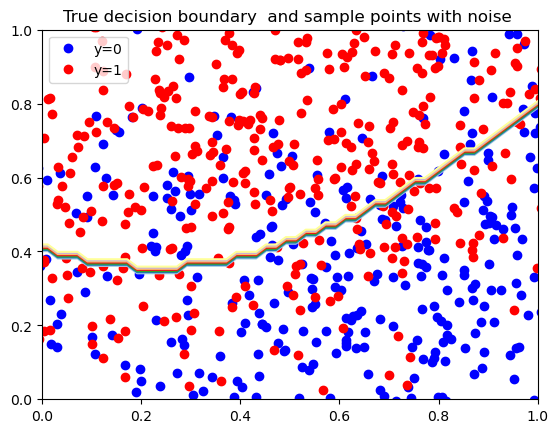

In [54]:
# Plot dataset objects

data_set = Data(noise_std=0.2)
data_set.plot()

In [55]:
# Create Validation data

torch.manual_seed(0)
validation_set = Data(train=False)

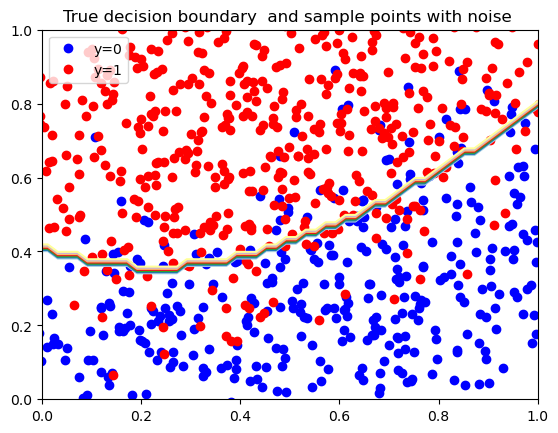

In [56]:
validation_set.plot()

In [59]:
# Create Net class with 3 layers adn p is dropout probability

class Net(nn.Module):
    #constructor
    def __init__(self, D_in, H, D_out, p=0):
        super(Net, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, H)
        self.linear3 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = F.relu(self.drop(self.linear1(x)))
        x = F.relu(self.drop(self.linear2(x)))
        x = self.linear3(x)
        return x

In [60]:
# Create 2 models, one with and other without dropout

model = Net(2, 300, 2)
model_drop = Net(2, 300, 2, p=0.5)

In [61]:
# TRain the model via mini-batch gradient descent

model_drop.train()

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=2, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=2, bias=True)
)

In [62]:
# optimizer function adn criterion functions

optimizer_ofit = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(model_drop.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

In [65]:
# LOSS dictionary to store the loss

LOSS = {}
LOSS['training_data_no_dropout'] = []
LOSS['validation_data_no_dropout'] = []
LOSS['training_data_dropout'] = []
LOSS['validation_data_dropout'] = []

In [66]:
# Train the Model

epochs = 500

def train_model(epochs):
    
    for epoch in range(epochs):
        yhat = model(data_set.x)
        yhat_drop = model_drop(data_set.x)
        loss = criterion(yhat, data_set.y)
        loss_drop = criterion(yhat_drop, data_set.y)
    
        #store the loss for both the training and validation data for both models 
        LOSS['training_data_no_dropout'].append(loss.item())
        LOSS['validation_data_no_dropout'].append(criterion(model(validation_set.x), validation_set.y).item())
        LOSS['training_data_dropout'].append(loss_drop.item())
        model_drop.eval()
        LOSS['validation_data_dropout'].append(criterion(model_drop(validation_set.x), validation_set.y).item())
        model_drop.train()
    
        optimizer_ofit.zero_grad()
        optimizer_drop.zero_grad()
        loss.backward()
        loss_drop.backward()
        optimizer_ofit.step()
        optimizer_drop.step()
    
train_model(epochs)

In [67]:
# set the model to evaluate model

model_drop.eval()

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=2, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=2, bias=True)
)

In [68]:
# Print out the accuracy of the model without dropout

print("The accuracy of the model without dropout: ", accuracy(model, validation_set))

The accuracy of the model without dropout:  0.786


In [74]:
# Print out the accuracy of the model with dropout

print("The accuracy of the model with dropout: ", accuracy(model_drop, validation_set))

The accuracy of the model with dropout:  0.837


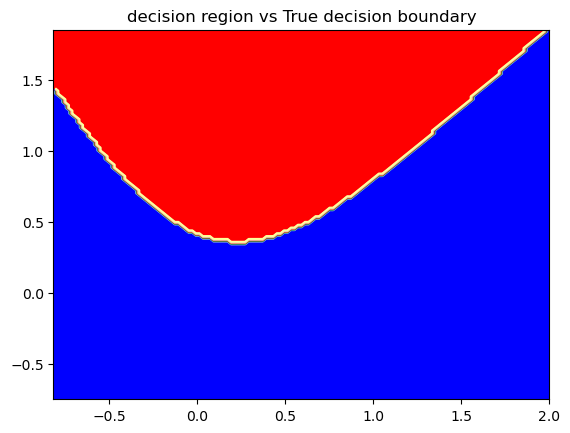

In [75]:
# Plot the decision boundary and the prediction

plot_decision_regions_3class(data_set)

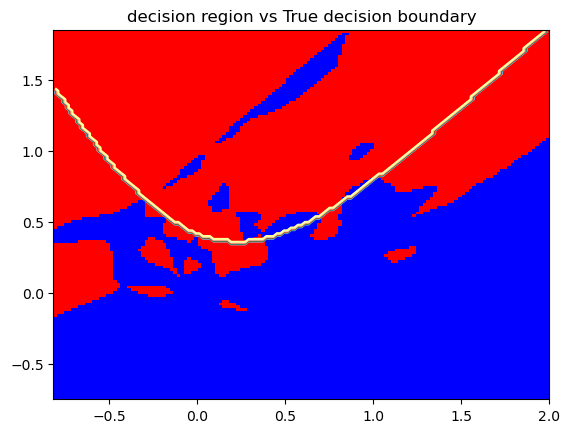

In [76]:
# The model without dropout

plot_decision_regions_3class(data_set, model)

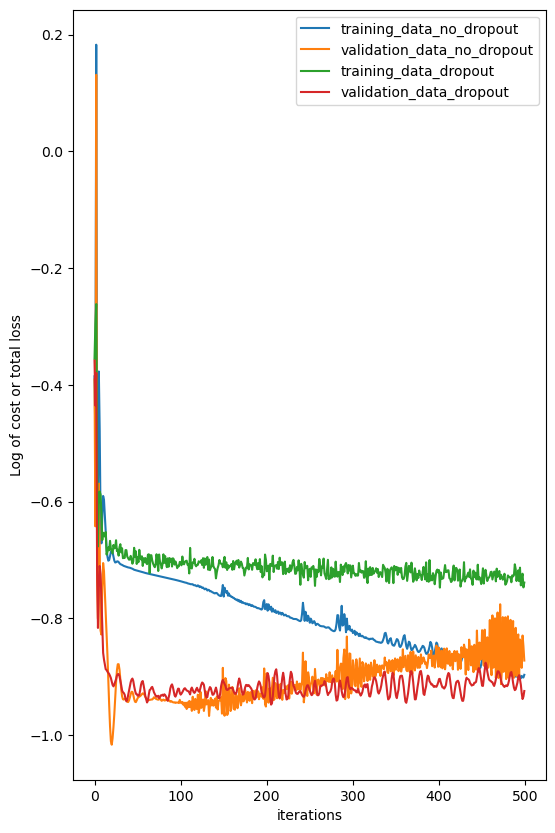

In [77]:
# Plot the LOSS

plt.figure(figsize=(6.1, 10))
def plot_LOSS():
    for key, value in LOSS.items():
        plt.plot(np.log(np.array(value)), label=key)
        plt.legend()
        plt.xlabel("iterations")
        plt.ylabel("Log of cost or total loss")

plot_LOSS()

# Using Dropout in Regression

In [78]:
# Import the libraries we need for the lab

import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0) 

In [79]:
# Create Data object

class Data(Dataset):
    
    # Constructor
    def __init__(self, N_SAMPLES=40, noise_std=1, train=True):
        self.x = torch.linspace(-1, 1, N_SAMPLES).view(-1, 1)
        self.f = self.x ** 2
        if train != True:
            torch.manual_seed(1)
            self.y = self.f + noise_std * torch.randn(self.f.size())
            self.y = self.y.view(-1, 1)
            torch.manual_seed(0)
        else:
            self.y = self.f + noise_std * torch.randn(self.f.size())
            self.y = self.y.view(-1, 1)
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot(self):
        plt.figure(figsize = (6.1, 10))
        plt.scatter(self.x.numpy(), self.y.numpy(), label="Samples")
        plt.plot(self.x.numpy(), self.f.numpy() ,label="True Function", color='orange')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((-1, 1))
        plt.ylim((-2, 2.5))
        plt.legend(loc="best")
        plt.show()

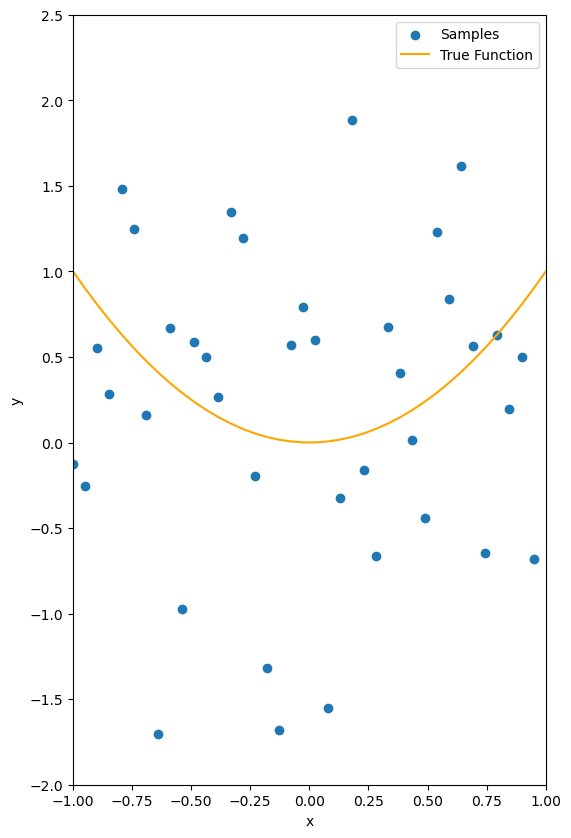

In [80]:
# Create the dataset object and plot the dataset

data_set = Data()
data_set.plot()

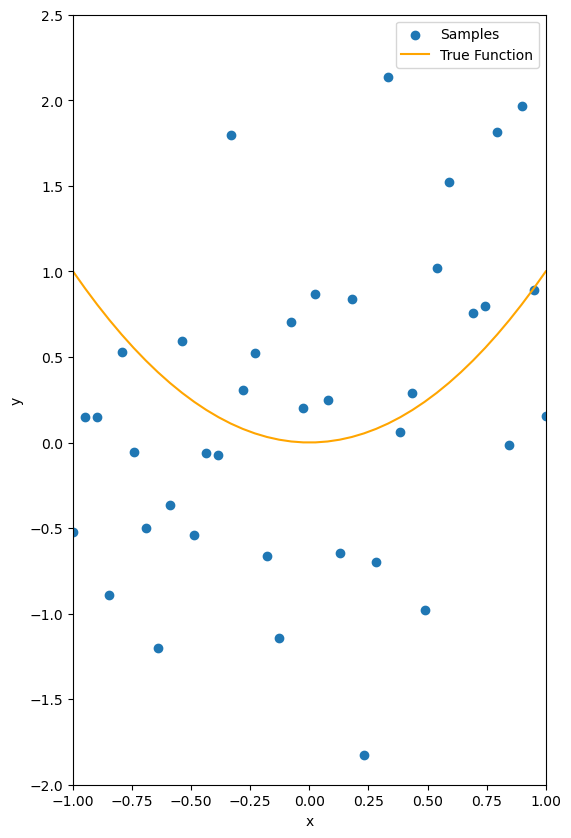

In [83]:
# Create validation dataset object

validation_set = Data(train=False)
validation_set.plot()

In [84]:
# Create the class for model

class Net(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden, out_size, p=0):
        super(Net, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(in_size, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_hidden)
        self.linear3 = nn.Linear(n_hidden, out_size)
        
    def forward(self, x):
        x = F.relu(self.drop(self.linear1(x)))
        x = F.relu(self.drop(self.linear2(x)))
        x = self.linear3(x)
        return x

In [85]:
# Create model objects

model = Net(1, 300, 1)
model_drop = Net(1, 300, 1, p=0.5)

In [86]:
# Set the model to train mode

model_drop.train()

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=1, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=1, bias=True)
)

In [87]:
# Set the optimizer and criterion function

optimizer_ofit = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(model_drop.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [89]:
# Initialize the dict to contain the loss results

LOSS={}
LOSS['training data no dropout']=[]
LOSS['validation data no dropout']=[]
LOSS['training data dropout']=[]
LOSS['validation data dropout']=[]

In [90]:
# Train the model

epochs = 500

def train_model(epochs):
    for epoch in range(epochs):
        yhat = model(data_set.x)
        yhat_drop = model_drop(data_set.x)
        loss = criterion(yhat, data_set.y)
        loss_drop = criterion(yhat_drop, data_set.y)

        #store the loss for  both the training and validation  data for both models 
        LOSS['training data no dropout'].append(loss.item())
        LOSS['validation data no dropout'].append(criterion(model(validation_set.x), validation_set.y).item())
        LOSS['training data dropout'].append(loss_drop.item())
        model_drop.eval()
        LOSS['validation data dropout'].append(criterion(model_drop(validation_set.x), validation_set.y).item())
        model_drop.train()

        optimizer_ofit.zero_grad()
        optimizer_drop.zero_grad()
        loss.backward()
        loss_drop.backward()
        optimizer_ofit.step()
        optimizer_drop.step()
        
train_model(epochs)

In [91]:
# Set the model with dropout to evaluation mode

model_drop.eval()

Net(
  (drop): Dropout(p=0.5, inplace=False)
  (linear1): Linear(in_features=1, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=1, bias=True)
)

In [93]:
# Make the prediction

yhat = model(data_set.x)
yhat_drop = model_drop(data_set.x)

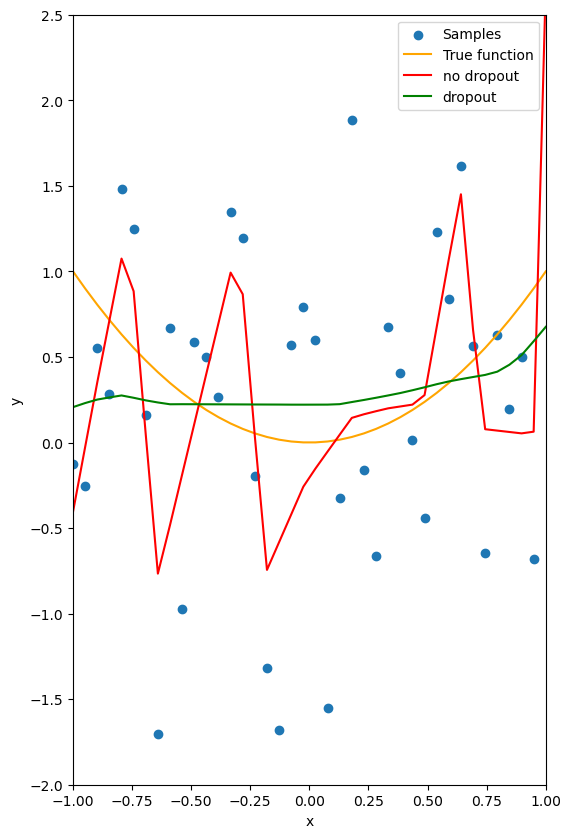

In [94]:
# Plot the predictions for both models

plt.figure(figsize=(6.1, 10))

plt.scatter(data_set.x.numpy(), data_set.y.numpy(), label="Samples")
plt.plot(data_set.x.numpy(), data_set.f.numpy(), label="True function", color='orange')
plt.plot(data_set.x.numpy(), yhat.detach().numpy(), label='no dropout', c='r')
plt.plot(data_set.x.numpy(), yhat_drop.detach().numpy(), label="dropout", c ='g')

plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-1, 1))
plt.ylim((-2, 2.5))
plt.legend(loc = "best")
plt.show()

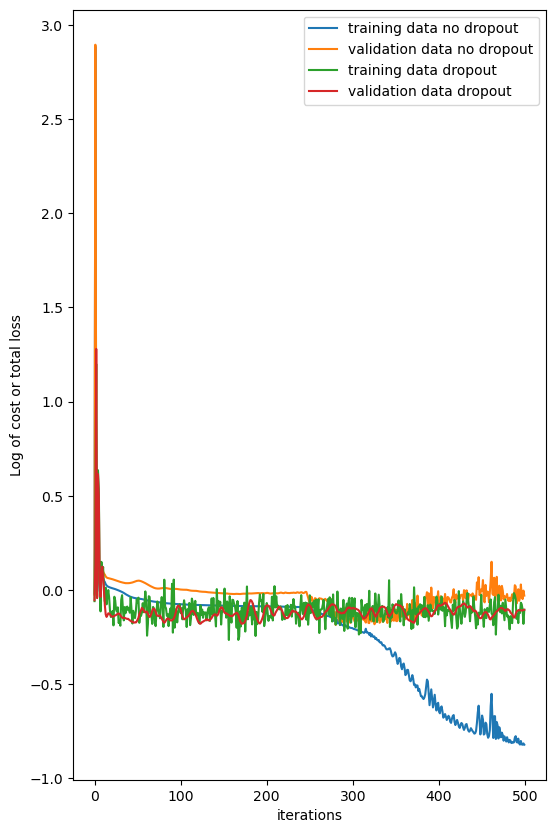

In [95]:
# Plot the loss

plt.figure(figsize=(6.1, 10))
for key, value in LOSS.items():
    plt.plot(np.log(np.array(value)), label=key)
    plt.legend()
    plt.xlabel("iterations")
    plt.ylabel("Log of cost or total loss")